In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

plt.style.use('fivethirtyeight')

# Problem statement

fhfhhf


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
csv_path = '/content/drive/MyDrive/heart_disease_data.csv'
data = pd.read_csv(csv_path)

In [4]:
# Display the first few rows of the dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
1,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
2,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
3,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
4,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1


# EXPLORATORY DATA ANALYSIS

We will explore the dataset to understand the data and to see what we can deduce from it.

This database contains 14 attributes, The "target" column is our dependent variable

### Discription of the data attribute
1. **age:** age in years
2. **sex:** sex (1 = male; 0 = female)
3. cp: chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4:    asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital) trestbps
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopyca
13. thal: 3 = normal; 6 = fixed defect
14. **target** - diagnosis of heart disease (angiographic disease status) -- Value 0: < 50% diameter narrowing -- Value 1: > 50% diameter narrowing (in any major vessel: attributes

## Objective
+ We want to see the distribution male and females with heart disease
+ We want to see the distribution of people with heart disease with respect to their age
+ Use different machine learning model to predict the if a patient has heart disease or not

Description of the data attribute
age: age in years
sex: sex (1 = male; 0 = female)
cp: chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic
trestbps: resting blood pressure (in mm Hg on admission to the hospital) trestbps
chol: serum cholestoral in mg/dl
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach: maximum heart rate achieved
exang: exercise induced angina (1 = yes; 0 = no)
oldpeak = ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping
ca: number of major vessels (0-3) colored by flourosopyca
thal: 3 = normal; 6 = fixed defect
target - diagnosis of heart disease (angiographic disease status) -- Value 0: < 50% diameter narrowing -- Value 1: > 50% diameter narrowing (in any major vessel: attributes

## Data Preprocessing

In [5]:
# data['sex_preprocessed'] = data['sex'].map({0: 'female', 1: 'male'})

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
1,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
2,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
3,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
4,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.074592,0.465626,1.031199,17.523642,51.787898,0.355903,0.525425,22.886223,0.469406,1.160115,0.615717,1.021761,0.611770,0.498422
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       606 non-null    int64  
 1   sex       606 non-null    int64  
 2   cp        606 non-null    int64  
 3   trestbps  606 non-null    int64  
 4   chol      606 non-null    int64  
 5   fbs       606 non-null    int64  
 6   restecg   606 non-null    int64  
 7   thalach   606 non-null    int64  
 8   exang     606 non-null    int64  
 9   oldpeak   606 non-null    float64
 10  slope     606 non-null    int64  
 11  ca        606 non-null    int64  
 12  thal      606 non-null    int64  
 13  target    606 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 66.4 KB


In [9]:
data['target'].value_counts()

1    330
0    276
Name: target, dtype: int64

From the result above we can note that we have
+ **330 patients with heart disease**
+ **276
 patients without heart disaese**

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


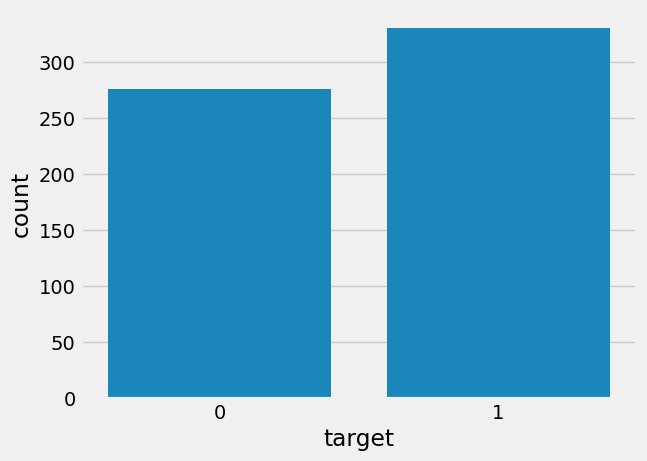

In [10]:
# Check for missing values
print(data.isnull().sum())

# Check the distribution of target variable
sns.countplot(x='target', data=data)
plt.show()



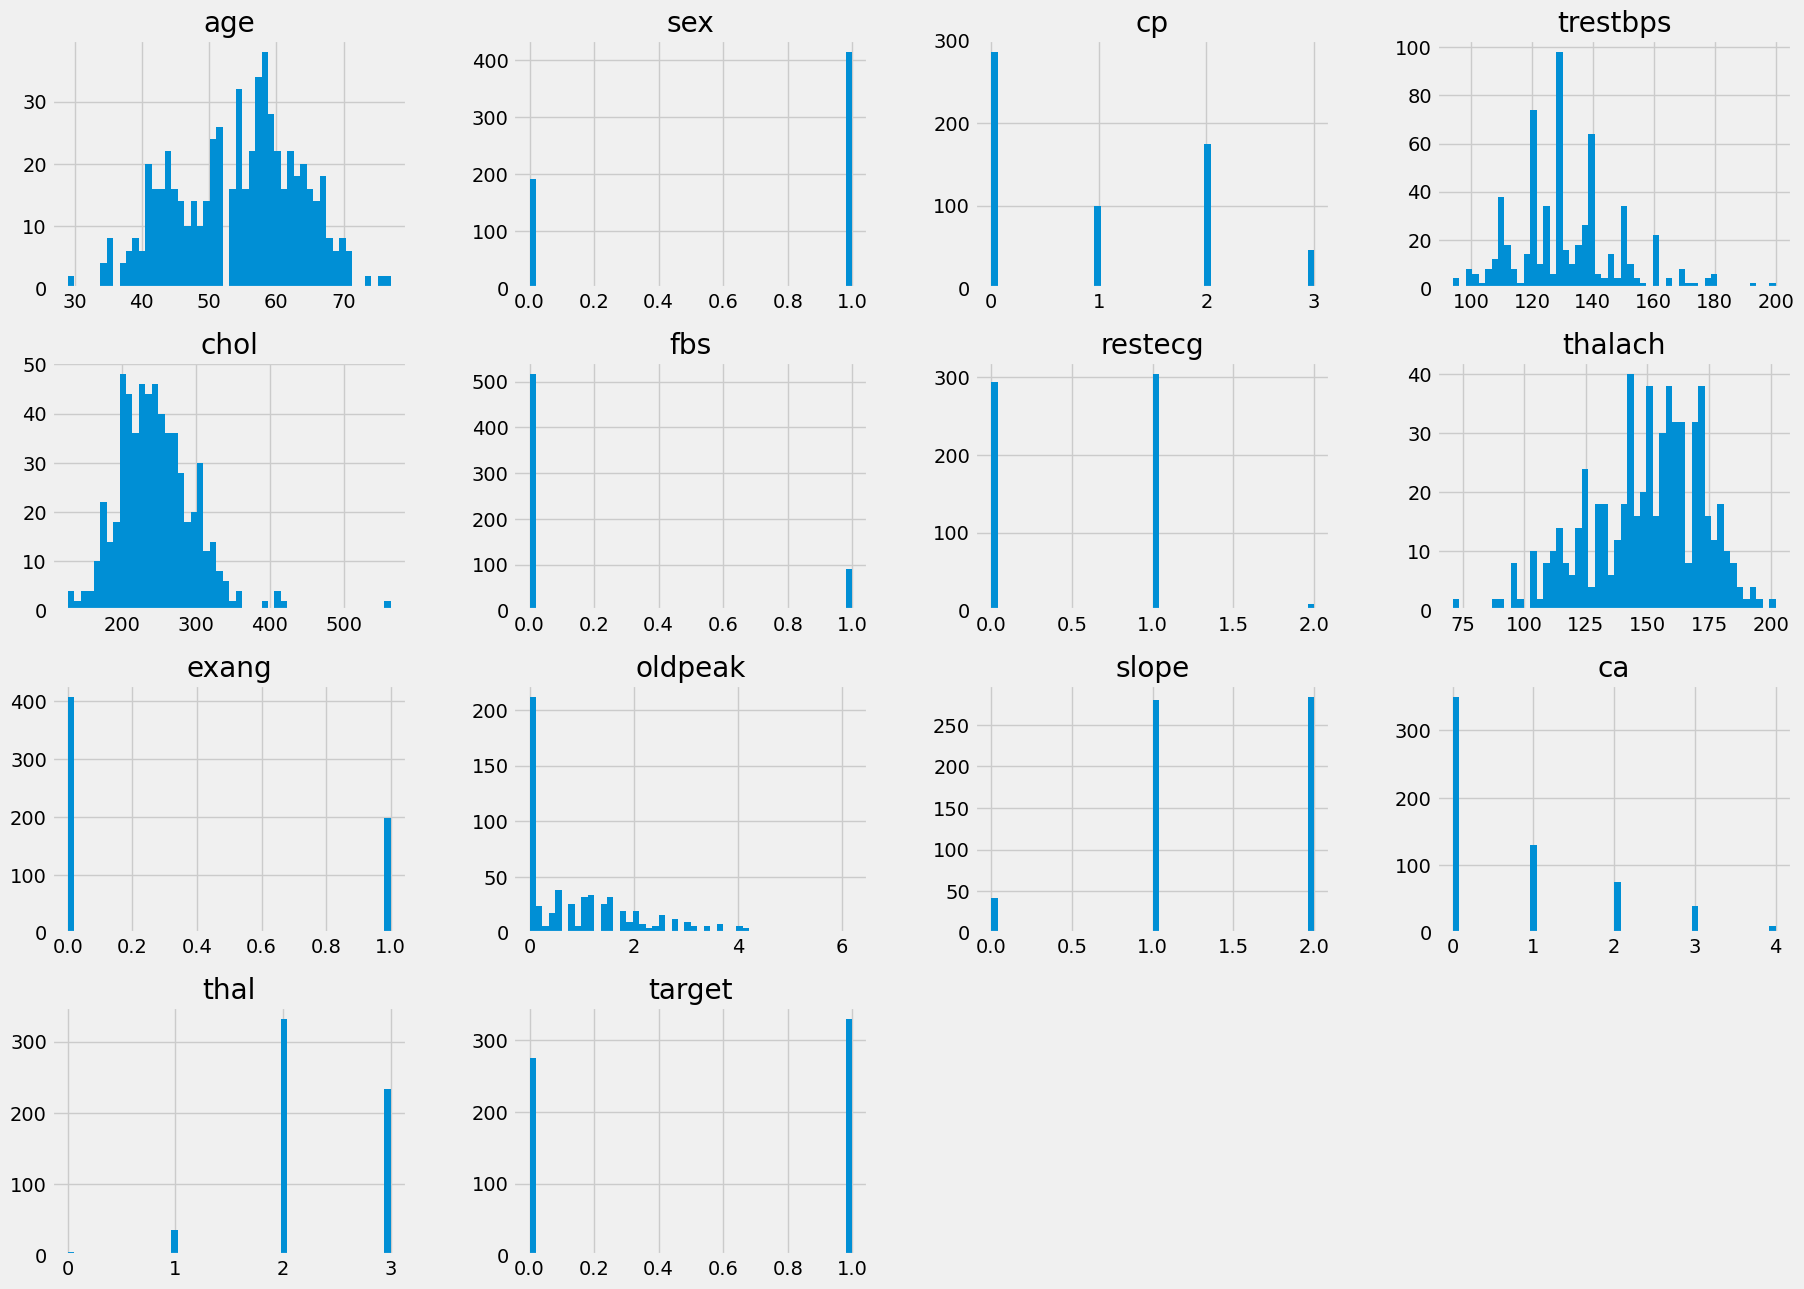

In [11]:
%matplotlib inline
data.hist(bins=50, figsize=(20,15))
plt.show()

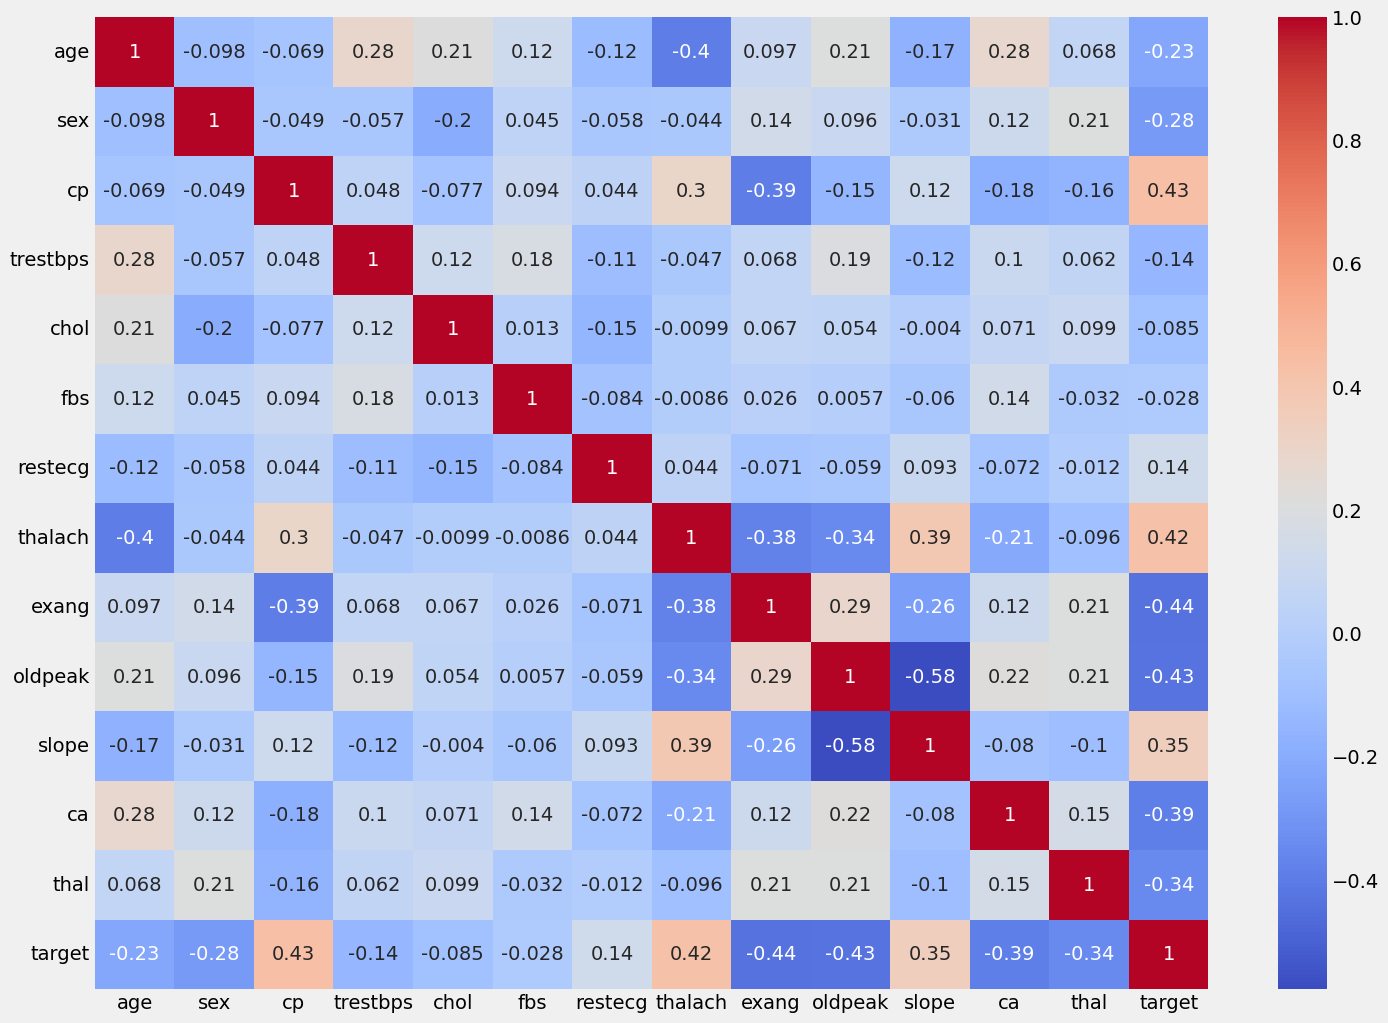

In [12]:
# Explore correlations between features and the target variable
corr_matrix = data.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

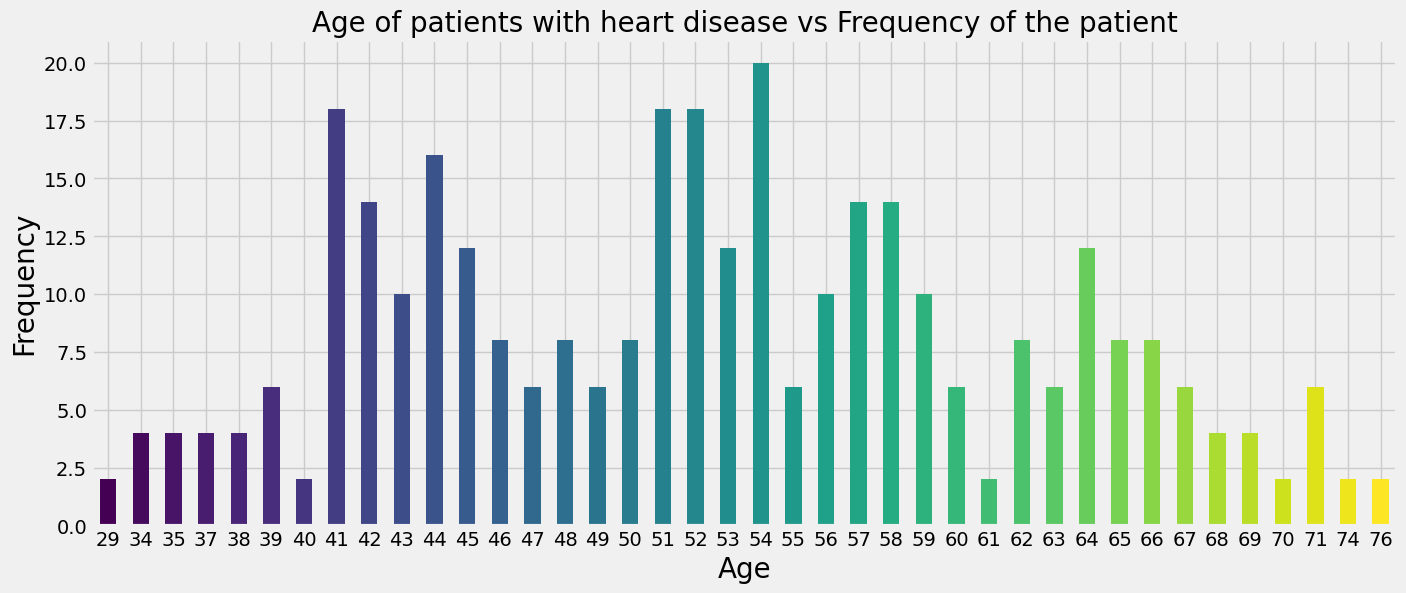

In [13]:

# Get the unique ages and their frequencies
age_counts = data[data['target'] == 1]['age'].value_counts().sort_index()

# Generate a color palette with as many colors as unique ages
colors = plt.cm.viridis(np.linspace(0, 1, len(age_counts)))

# Plot the frequency of patients with heart disease
ax = age_counts.plot.bar(
    figsize=(15, 6),
    fontsize=14,
    title="Age of patients with heart disease vs Frequency of the patient",
    rot=0,
    color=colors
)
ax.set_xlabel("Age", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)
ax.set_title("Age of patients with heart disease vs Frequency of the patient", fontsize=20)

plt.show()

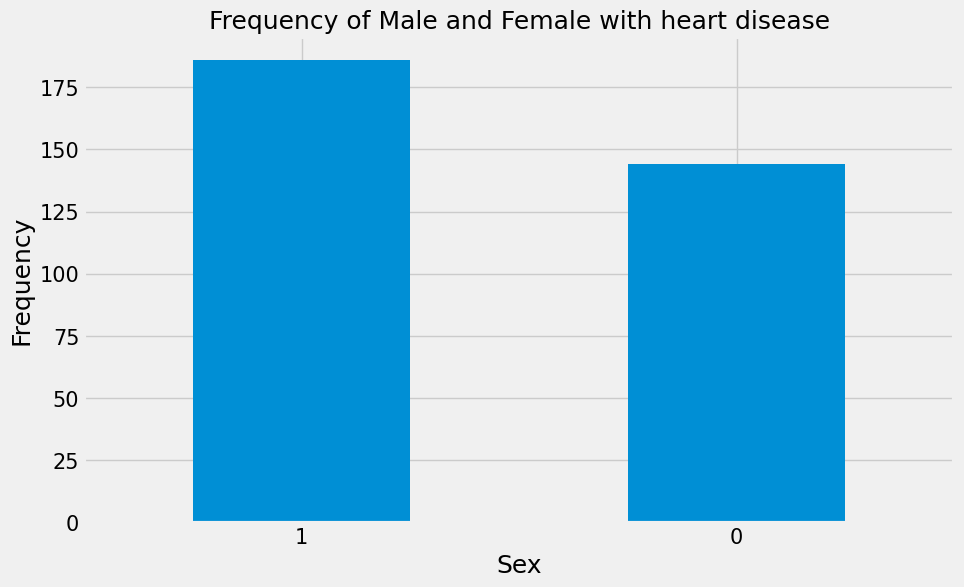

In [14]:
# Ratio of male to female


# Plot the frequency of Male to Female with heart disease
fig, ax = plt.subplots(figsize=(10, 6))

data[data['target'] == 1]['sex'].value_counts().plot.bar(
    ax=ax,
    rot=0,
    fontsize=15,
    title='Frequency of Male and Female with heart disease'
)
ax.set_title('Frequency of Male and Female with heart disease', fontsize=18)
ax.set_xlabel("Sex", fontsize=18)
ax.set_ylabel("Frequency", fontsize=18)

plt.show()


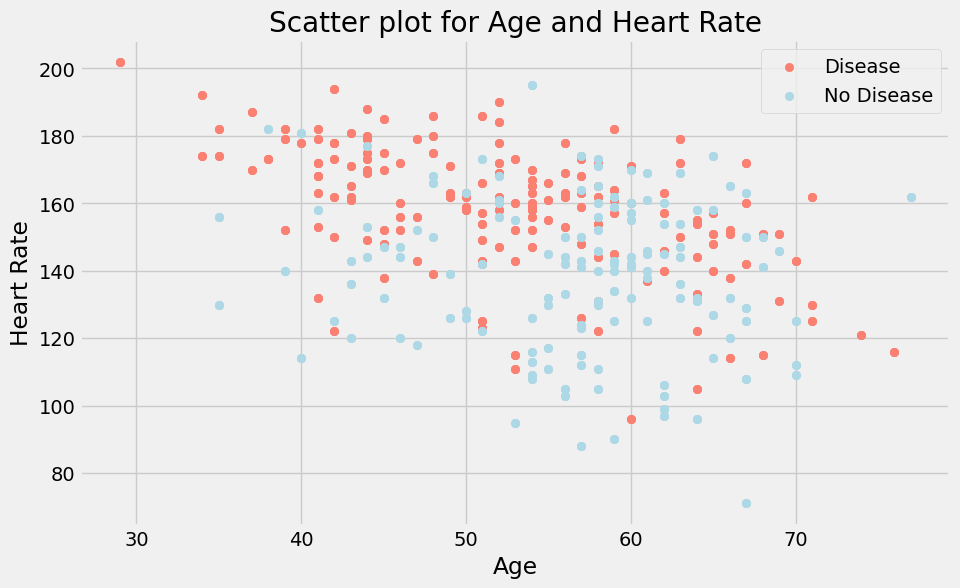

In [15]:
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Scatter plot for Age and Heart Rate")
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.legend(["Disease", "No Disease"]);

This chart show that more males have heart disease then females

# Machine Learning Models

For this analysis I used

* Random Forest
* Support Vector Classifier (SVC)
* Multilayer Perceptron Classifier

 ## Random Forest Classifier


In [16]:
# Split the data into features (X) and target variable (y)
X = data.drop('target', axis=1)
y = data['target']

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Build the Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [19]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Make predictions
rf_pred = rf_model.predict(X_test)

In [21]:
#Calculate the accuracy of the RandomForestClassifier  model
rf_acc = accuracy_score(y_test, rf_pred)
rf_acc

0.9508196721311475

In [22]:
# Evaluate the model
print("Random Forest Classifier Performance:")
print(classification_report(y_test, rf_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_pred))


Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        50
           1       0.92      1.00      0.96        72

    accuracy                           0.95       122
   macro avg       0.96      0.94      0.95       122
weighted avg       0.95      0.95      0.95       122

Confusion Matrix:
[[44  6]
 [ 0 72]]
ROC-AUC Score: 0.94


In [23]:
#checking the performance of the model
rf_performance = pd.DataFrame({'Expected':y_test, 'Predicted':rf_pred })
rf_performance.head(10)

,Expected,Predicted
572,0,0
289,1,1
76,1,1
78,0,0
182,1,1
582,0,1
10,1,1
131,0,0
444,1,1
86,1,1


In [24]:
rf_model_score = rf_model.score(X_test, y_test)
print(rf_model_score)

0.9508196721311475


## Support Vector Classifier (SVC)


 The SVC model is using a radial basis function (RBF) kernel, also known as Gaussian kernel. RBF kernel is often more flexible and can capture complex relationships between features.

In [25]:
# Support Vector Machine Classifier
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)



In [26]:
#checking the performance of the model
svm_performance = pd.DataFrame({'Expected':y_test, 'Predicted':svm_y_pred })
svm_performance.head(10)

,Expected,Predicted
572,0,1
289,1,1
76,1,1
78,0,1
182,1,0
582,0,0
10,1,1
131,0,0
444,1,1
86,1,1


In [27]:
# Making the Confusion Matrix
svc_cm = confusion_matrix(y_test, svm_y_pred)
svc_cm

array([[29, 21],
       [17, 55]])

In [28]:
#Calculate the accuracy of SVC model
svc_acc = accuracy_score(y_test, svm_y_pred)
svc_acc

0.6885245901639344

In [29]:
print("Support Vector Machine Classifier Performance:")
print(classification_report(y_test, svm_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, svm_y_pred))

Support Vector Machine Classifier Performance:
              precision    recall  f1-score   support

           0       0.63      0.58      0.60        50
           1       0.72      0.76      0.74        72

    accuracy                           0.69       122
   macro avg       0.68      0.67      0.67       122
weighted avg       0.69      0.69      0.69       122

Confusion Matrix:
[[29 21]
 [17 55]]
ROC-AUC Score: 0.6719444444444445


In [30]:
svm_model_score = svm_model.score(X_test, y_test)
print(svm_model_score)

0.6885245901639344


## Multilayer Perceptron Classifier

In [31]:
# Multilayer Perceptron Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)
mlp_y_pred = mlp_model.predict(X_test)

In [32]:
print("Multilayer Perceptron Classifier Performance:")
print(classification_report(y_test, mlp_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, mlp_y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, mlp_y_pred))

Multilayer Perceptron Classifier Performance:
              precision    recall  f1-score   support

           0       0.70      0.84      0.76        50
           1       0.87      0.75      0.81        72

    accuracy                           0.79       122
   macro avg       0.79      0.79      0.78       122
weighted avg       0.80      0.79      0.79       122

Confusion Matrix:
[[42  8]
 [18 54]]
ROC-AUC Score: 0.7949999999999999


In [33]:
mlp_model_score = mlp_model.score(X_test, y_test)
print(mlp_model_score)

0.7868852459016393


In [34]:
# Put models in a dictionary
model_scores = {"SVC": svm_model_score,
          "RFC": rf_model_score,
          "MPC": mlp_model_score}

    # Multilayer Perceptron Classifier - MPC
    # Random Forest Classifier - RFC
    # Support Vector Classifier - SVC


In [35]:
print(model_scores)

{'SVC': 0.6885245901639344, 'RFC': 0.9508196721311475, 'MPC': 0.7868852459016393}


### Feature importances

Text(0, 0.5, 'Feature')

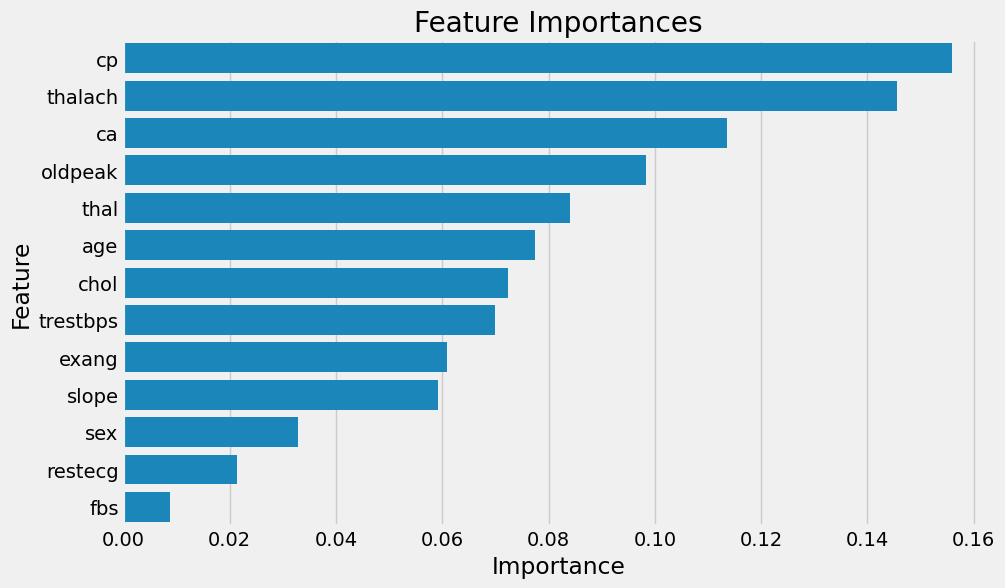

In [36]:
# Visualize feature importances
feature_importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[indices], y=feature_names[indices])
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")

# Performance Evaluation

In [37]:
# Random Forest Classifier Evaluation
print("Random Forest Classifier Performance:")
print(classification_report(y_test, rf_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_pred))

# Support Vector Machine Classifier Evaluation
print("\nSupport Vector Machine Classifier Performance:")
print(classification_report(y_test, svm_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, svm_y_pred))

# Multilayer Perceptron Classifier Evaluation
print("\nMultilayer Perceptron Classifier Performance:")
print(classification_report(y_test, mlp_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, mlp_y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, mlp_y_pred))


Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        50
           1       0.92      1.00      0.96        72

    accuracy                           0.95       122
   macro avg       0.96      0.94      0.95       122
weighted avg       0.95      0.95      0.95       122

Confusion Matrix:
[[44  6]
 [ 0 72]]
ROC-AUC Score: 0.94

Support Vector Machine Classifier Performance:
              precision    recall  f1-score   support

           0       0.63      0.58      0.60        50
           1       0.72      0.76      0.74        72

    accuracy                           0.69       122
   macro avg       0.68      0.67      0.67       122
weighted avg       0.69      0.69      0.69       122

Confusion Matrix:
[[29 21]
 [17 55]]
ROC-AUC Score: 0.6719444444444445

Multilayer Perceptron Classifier Performance:
              precision    recall  f1-score   support

           0       0.70      0

In [38]:
print(y_test)

572    0
289    1
76     1
78     0
182    1
      ..
249    1
365    0
452    0
388    0
235    1
Name: target, Length: 122, dtype: int64


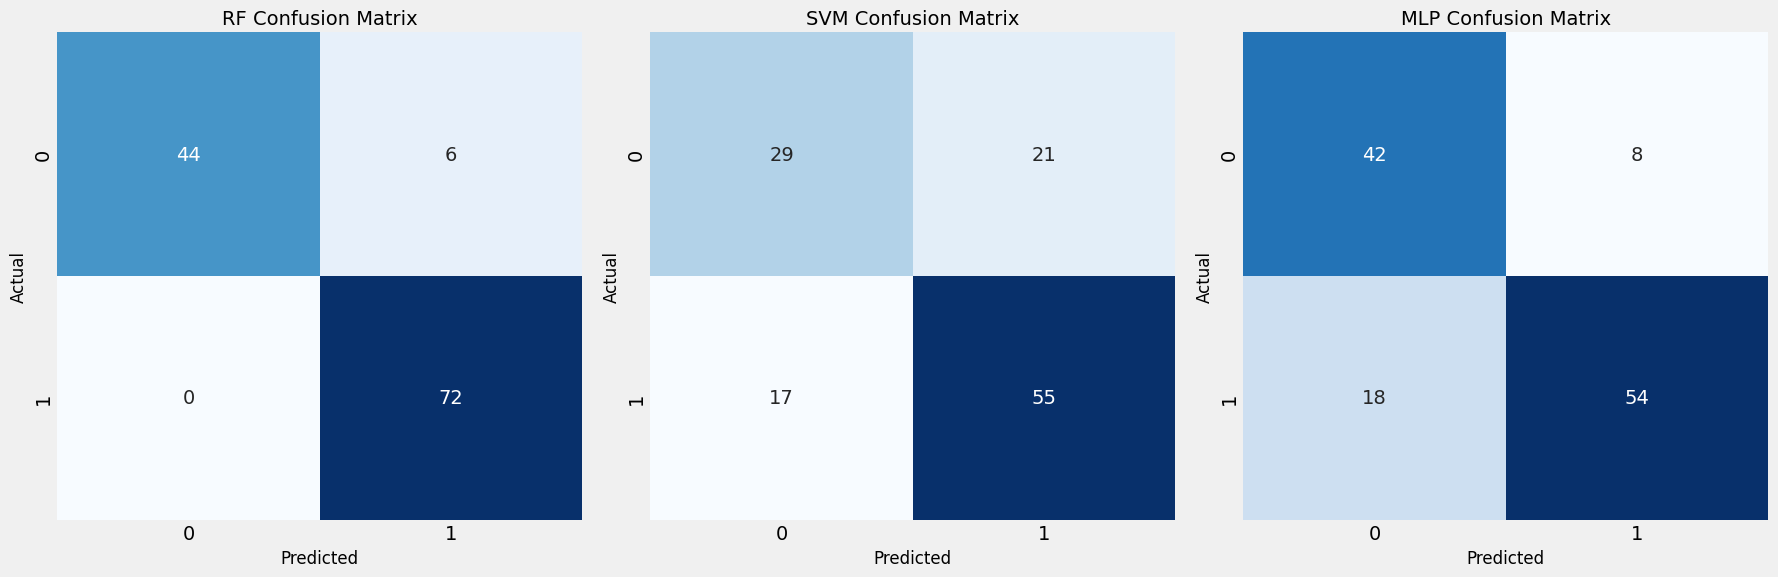

In [39]:
# Function to plot confusion matrix
def plot_confusion_matrix(ax, y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, ax=ax)
    ax.set_xlabel('Predicted', fontsize=12)
    ax.set_ylabel('Actual', fontsize=12)
    ax.set_title(title, fontsize=14)

# Create subplots for each Confusion Matrix
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot Confusion Matrix for Random Forest Classifier
plot_confusion_matrix(axs[0], y_test, rf_pred, title="RF Confusion Matrix")

# Plot Confusion Matrix for Support Vector Machine Classifier
plot_confusion_matrix(axs[1], y_test, svm_y_pred, title="SVM Confusion Matrix")

# Plot Confusion Matrix for Multilayer Perceptron Classifier
plot_confusion_matrix(axs[2], y_test, mlp_y_pred, title="MLP Confusion Matrix")

plt.tight_layout()
plt.show()

# Conclusion

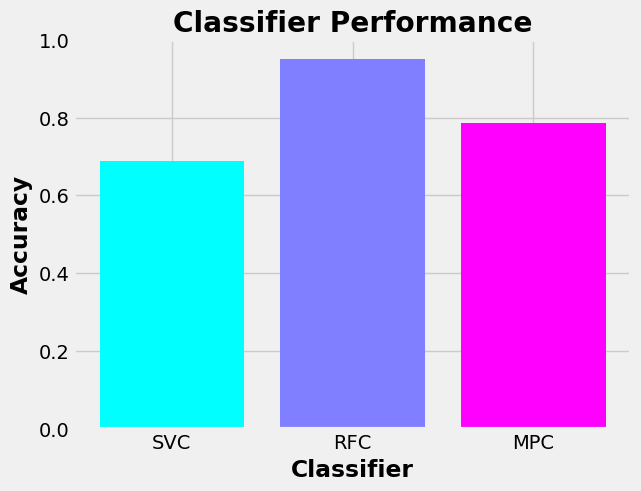

In [40]:
colors = plt.cm.cool(np.linspace(0, 1, len(model_scores)))

plt.bar(model_scores.keys(), model_scores.values(), color=colors, label='Accuracy')
plt.title('Classifier Performance', fontweight='bold')
plt.xlabel('Classifier', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.ylim(0, 1)
plt.show()